# Data Analysis

## Librerias

### Instalacion

In [112]:
import sys
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install folium

### Importacion

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import folium

## Lectura Datos

In [94]:
dfFinalSet = pd.read_csv('FinalSet.csv', dtype = {'codigoencabezado': 'int32'})

dfFinalSet.describe(include = 'all')

,codigoencabezado,idregistro,linkpagina,fecharegistro,administracion,amueblado,antiguedad,banos,habitaciones,estudio,...,moneda,tipo,tipo_vendedor,favoritos,titulo,fecha_creacion,valido_hasta,descripcion,partner_code,user_id
count,520.000000,5.200000e+02,520,520,97.000000,295,178,520.000000,520.000000,520,...,520,520,431,520.000000,520,520,520,520,81,5.200000e+02
unique,NaN,NaN,303,4,NaN,2,7,NaN,NaN,2,...,2,2,2,NaN,292,323,299,300,47,NaN
top,NaN,NaN,https://www.olx.com.gt/item/alquilo-apartament...,2020-05-20,NaN,No,A estrenar,NaN,NaN,No,...,US$,Apartamento,Inmobiliaria,NaN,APARTAMENTO EN ZONA 15 / ACODI,2020-05-16T03:21:04-06:00,2020-08-13T03:22:20-06:00,"Vivienda abierta (sin muros en el dormitorio),...",11218,NaN
freq,NaN,NaN,5,240,NaN,216,56,NaN,NaN,515,...,377,511,385,NaN,7,8,8,6,4,NaN
mean,260.500000,1.092811e+09,NaN,NaN,434.608247,NaN,NaN,1.988462,2.155769,NaN,...,NaN,NaN,NaN,1.355769,NaN,NaN,NaN,NaN,NaN,3.356498e+07
std,150.255338,1.723419e+07,NaN,NaN,692.991501,NaN,NaN,0.851080,0.853851,NaN,...,NaN,NaN,NaN,3.213406,NaN,NaN,NaN,NaN,NaN,2.283419e+07
min,1.000000,1.033663e+09,NaN,NaN,0.000000,NaN,NaN,1.000000,1.000000,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,4.263970e+06
25%,130.750000,1.100198e+09,NaN,NaN,0.000000,NaN,NaN,1.000000,2.000000,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,2.325799e+07
50%,260.500000,1.100371e+09,NaN,NaN,0.000000,NaN,NaN,2.000000,2.000000,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,2.678192e+07
75%,390.250000,1.100374e+09,NaN,NaN,750.000000,NaN,NaN,2.000000,3.000000,NaN,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,5.658755e+07


## Data Wrangling

### Conversion Series

In [95]:
dfAnalisisSet = dfFinalSet.astype({'codigoencabezado': 'str', 
                                'idregistro': 'str',
                                'partner_code': 'str',
                                'user_id': 'str'
                               })

dfAnalisisSet['fecharegistro'] = pd.to_datetime(dfAnalisisSet['fecharegistro'], format = "%Y-%m-%d")

dfAnalisisSet.describe(include = 'all')

,codigoencabezado,idregistro,linkpagina,fecharegistro,administracion,amueblado,antiguedad,banos,habitaciones,estudio,...,moneda,tipo,tipo_vendedor,favoritos,titulo,fecha_creacion,valido_hasta,descripcion,partner_code,user_id
count,520,520,520,520,97.000000,295,178,520.000000,520.000000,520,...,520,520,431,520.000000,520,520,520,520,520,520
unique,520,303,303,4,NaN,2,7,NaN,NaN,2,...,2,2,2,NaN,292,323,299,300,48,91
top,349,1100373467,https://www.olx.com.gt/item/alquilo-apartament...,2020-05-20 00:00:00,NaN,No,A estrenar,NaN,NaN,No,...,US$,Apartamento,Inmobiliaria,NaN,APARTAMENTO EN ZONA 15 / ACODI,2020-05-16T03:21:04-06:00,2020-08-13T03:22:20-06:00,"Vivienda abierta (sin muros en el dormitorio),...",nan,24012106
freq,1,5,5,240,NaN,216,56,NaN,NaN,515,...,377,511,385,NaN,7,8,8,6,439,93
first,NaN,NaN,NaN,2020-05-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2020-05-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,434.608247,NaN,NaN,1.988462,2.155769,NaN,...,NaN,NaN,NaN,1.355769,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,692.991501,NaN,NaN,0.851080,0.853851,NaN,...,NaN,NaN,NaN,3.213406,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,1.000000,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,2.000000,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


### Registros Unicos
Se obtendran solo los ultimos registros obtenidos para cada id de registro (idregistro) utilizando el campo fecharegistro.

In [96]:
dfAnalisisSet = dfAnalisisSet.loc[dfAnalisisSet.reset_index().groupby(['idregistro'])['fecharegistro'].idxmax()]

dfAnalisisSet.head(10)

,codigoencabezado,idregistro,linkpagina,fecharegistro,administracion,amueblado,antiguedad,banos,habitaciones,estudio,...,moneda,tipo,tipo_vendedor,favoritos,titulo,fecha_creacion,valido_hasta,descripcion,partner_code,user_id
323,324,1033662607,https://www.olx.com.gt/item/se-alquila-apartam...,2020-05-20,NaN,No,NaN,3,3,No,...,US$,Apartamento,Inmobiliaria,1,Se alquila Apartamento en zona 16 en el sector...,2020-04-29T14:13:30-06:00,2020-07-28T14:13:30-06:00,"Apartamento para estrenar muy cerca a Cayalá, ...",nan,15462053
425,426,1044844084,https://www.olx.com.gt/item/apartamento-en-zon...,2020-05-20,NaN,No,NaN,1,1,No,...,US$,Apartamento,Inmobiliaria,0,APARTAMENTO EN ZONA 10 / ACODI,2020-05-15T18:33:41-06:00,2020-08-13T18:33:41-06:00,Edificio\n– Piscina\n– Gimnasio\n– Área verde ...,nan,24012106
426,427,1044844541,https://www.olx.com.gt/item/apartamento-en-lir...,2020-05-20,NaN,NaN,NaN,2,3,No,...,US$,Apartamento,Inmobiliaria,0,"APARTAMENTO EN LIRIOS, ZONA 16 / ACODI",2020-05-15T18:32:13-06:00,2020-08-13T18:32:13-06:00,– Área de construcción: 120 m2\n\n– Sala\n– Co...,nan,24012106
427,428,1044963404,https://www.olx.com.gt/item/apartamento-en-lir...,2020-05-20,NaN,No,NaN,2,3,No,...,US$,Apartamento,Inmobiliaria,0,"APARTAMENTO EN LIRIOS, ZONA 16 / ACODI",2020-05-15T18:27:15-06:00,2020-08-13T18:27:15-06:00,Edificio\n– Piscina\n– Gimnasio\n– Áreas verde...,nan,24012106
428,429,1045112739,https://www.olx.com.gt/item/apartamento-torre-...,2020-05-20,NaN,NaN,NaN,2,2,No,...,US$,Apartamento,Inmobiliaria,1,"APARTAMENTO TORRE CAPRESE, ZONA 15 OPCIÓN 3/ACODI",2020-05-15T18:10:32-06:00,2020-08-13T18:10:32-06:00,Edificio\n– De 11 Niveles\n– 2 Elevadores\n– 2...,nan,24012106
429,430,1045114174,https://www.olx.com.gt/item/apartamento-liv-vi...,2020-05-20,NaN,NaN,NaN,2,3,No,...,US$,Apartamento,Inmobiliaria,0,"APARTAMENTO LIV VISTA HERMOSA I, ZONA 15 OPCIÓ...",2020-05-15T18:09:01-06:00,2020-08-13T18:09:01-06:00,Complejo \n– Accesos por 2 vías (19 avenida y ...,nan,24012106
430,431,1045221839,https://www.olx.com.gt/item/apartamento-torre-...,2020-05-20,NaN,NaN,NaN,4,4,No,...,US$,Apartamento,Inmobiliaria,1,"APARTAMENTO TORRE CAPRESE, ZONA 15 OPCIÓN 1/ A...",2020-05-15T17:56:03-06:00,2020-08-13T17:56:03-06:00,Edificio\n– De 11 Niveles\n– 2 Elevadores\n– 2...,nan,24012106
431,432,1045223186,https://www.olx.com.gt/item/apartamento-en-cas...,2020-05-20,NaN,NaN,NaN,2,3,No,...,US$,Apartamento,Inmobiliaria,1,"APARTAMENTO EN CASA MARGARITA, ZONA 10/ ACODI",2020-05-15T17:53:55-06:00,2020-08-13T17:53:55-06:00,Edificio\n– Piscina\n– Gimnasio\n– Sauna\n– Sa...,nan,24012106
471,472,1045634091,https://www.olx.com.gt/item/apartamentos-en-bo...,2020-05-20,NaN,NaN,NaN,2,3,No,...,Q,Apartamento,Inmobiliaria,2,APARTAMENTOS EN BOSQUES DE EUSKADI OPCIÓN 2/ A...,2020-05-14T17:03:17-06:00,2020-08-12T17:03:17-06:00,Edificio:\n– Garita de control\n– Salón social...,nan,24012106
484,485,1047819336,https://www.olx.com.gt/item/apartamentos-en-sh...,2020-05-20,NaN,NaN,NaN,1,1,No,...,US$,Apartamento,Inmobiliaria,1,"APARTAMENTOS EN SHIFT CAYALA, ZONA 16 OPCIÓN 1...",2020-05-14T15:08:17-06:00,2020-08-12T15:08:17-06:00,Edificio\n– Lobby\n– Gimnasio\n– Lounge\n– Spa...,nan,24012106


### Cambio Moneda Precio

In [97]:
cambio_moneda = 7.69
dfAnalisisSet['precio_real'] = np.where(dfAnalisisSet['moneda'] == 'US$', dfAnalisisSet['precio'] * cambio_moneda, 
                                        dfAnalisisSet['precio'])

dfAnalisisSet.head(10)

,codigoencabezado,idregistro,linkpagina,fecharegistro,administracion,amueblado,antiguedad,banos,habitaciones,estudio,...,tipo,tipo_vendedor,favoritos,titulo,fecha_creacion,valido_hasta,descripcion,partner_code,user_id,precio_real
323,324,1033662607,https://www.olx.com.gt/item/se-alquila-apartam...,2020-05-20,NaN,No,NaN,3,3,No,...,Apartamento,Inmobiliaria,1,Se alquila Apartamento en zona 16 en el sector...,2020-04-29T14:13:30-06:00,2020-07-28T14:13:30-06:00,"Apartamento para estrenar muy cerca a Cayalá, ...",nan,15462053,23070.00
425,426,1044844084,https://www.olx.com.gt/item/apartamento-en-zon...,2020-05-20,NaN,No,NaN,1,1,No,...,Apartamento,Inmobiliaria,0,APARTAMENTO EN ZONA 10 / ACODI,2020-05-15T18:33:41-06:00,2020-08-13T18:33:41-06:00,Edificio\n– Piscina\n– Gimnasio\n– Área verde ...,nan,24012106,7690.00
426,427,1044844541,https://www.olx.com.gt/item/apartamento-en-lir...,2020-05-20,NaN,NaN,NaN,2,3,No,...,Apartamento,Inmobiliaria,0,"APARTAMENTO EN LIRIOS, ZONA 16 / ACODI",2020-05-15T18:32:13-06:00,2020-08-13T18:32:13-06:00,– Área de construcción: 120 m2\n\n– Sala\n– Co...,nan,24012106,2022470.00
427,428,1044963404,https://www.olx.com.gt/item/apartamento-en-lir...,2020-05-20,NaN,No,NaN,2,3,No,...,Apartamento,Inmobiliaria,0,"APARTAMENTO EN LIRIOS, ZONA 16 / ACODI",2020-05-15T18:27:15-06:00,2020-08-13T18:27:15-06:00,Edificio\n– Piscina\n– Gimnasio\n– Áreas verde...,nan,24012106,9997.00
428,429,1045112739,https://www.olx.com.gt/item/apartamento-torre-...,2020-05-20,NaN,NaN,NaN,2,2,No,...,Apartamento,Inmobiliaria,1,"APARTAMENTO TORRE CAPRESE, ZONA 15 OPCIÓN 3/ACODI",2020-05-15T18:10:32-06:00,2020-08-13T18:10:32-06:00,Edificio\n– De 11 Niveles\n– 2 Elevadores\n– 2...,nan,24012106,2679072.96
429,430,1045114174,https://www.olx.com.gt/item/apartamento-liv-vi...,2020-05-20,NaN,NaN,NaN,2,3,No,...,Apartamento,Inmobiliaria,0,"APARTAMENTO LIV VISTA HERMOSA I, ZONA 15 OPCIÓ...",2020-05-15T18:09:01-06:00,2020-08-13T18:09:01-06:00,Complejo \n– Accesos por 2 vías (19 avenida y ...,nan,24012106,3187843.36
430,431,1045221839,https://www.olx.com.gt/item/apartamento-torre-...,2020-05-20,NaN,NaN,NaN,4,4,No,...,Apartamento,Inmobiliaria,1,"APARTAMENTO TORRE CAPRESE, ZONA 15 OPCIÓN 1/ A...",2020-05-15T17:56:03-06:00,2020-08-13T17:56:03-06:00,Edificio\n– De 11 Niveles\n– 2 Elevadores\n– 2...,nan,24012106,7533893.00
431,432,1045223186,https://www.olx.com.gt/item/apartamento-en-cas...,2020-05-20,NaN,NaN,NaN,2,3,No,...,Apartamento,Inmobiliaria,1,"APARTAMENTO EN CASA MARGARITA, ZONA 10/ ACODI",2020-05-15T17:53:55-06:00,2020-08-13T17:53:55-06:00,Edificio\n– Piscina\n– Gimnasio\n– Sauna\n– Sa...,nan,24012106,6921000.00
471,472,1045634091,https://www.olx.com.gt/item/apartamentos-en-bo...,2020-05-20,NaN,NaN,NaN,2,3,No,...,Apartamento,Inmobiliaria,2,APARTAMENTOS EN BOSQUES DE EUSKADI OPCIÓN 2/ A...,2020-05-14T17:03:17-06:00,2020-08-12T17:03:17-06:00,Edificio:\n– Garita de control\n– Salón social...,nan,24012106,1041468.00
484,485,1047819336,https://www.olx.com.gt/item/apartamentos-en-sh...,2020-05-20,NaN,NaN,NaN,1,1,No,...,Apartamento,Inmobiliaria,1,"APARTAMENTOS EN SHIFT CAYALA, ZONA 16 OPCIÓN 1...",2020-05-14T15:08:17-06:00,2020-08-12T15:08:17-06:00,Edificio\n– Lobby\n– Gimnasio\n– Lounge\n– Spa...,nan,24012106,943301.54


### Columna Oferta
Se creara una columna que determine si la oferta es de alquiler o venta. Se utilizara el campo 

In [98]:
dfAnalisisSet['oferta'] = ['Venta' if precio > 50000 else 'Alquiler' for precio in dfAnalisisSet['precio_real']]

dfAnalisisSet.groupby(['oferta']).count()['codigoencabezado']

oferta
Alquiler    184
Venta       119
Name: codigoencabezado, dtype: int64

## Data Visualization

### Precio por apartamento amueblado

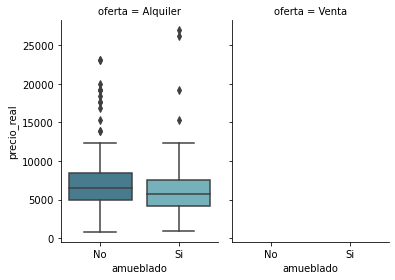

In [99]:
sns.catplot(x = 'amueblado', y = 'precio_real', 
            col = 'oferta', 
            kind = 'box', 
            data = dfAnalisisSet,
            palette = 'GnBu_d',
            height=4, 
            aspect=.7)

### Precio por antiguedad

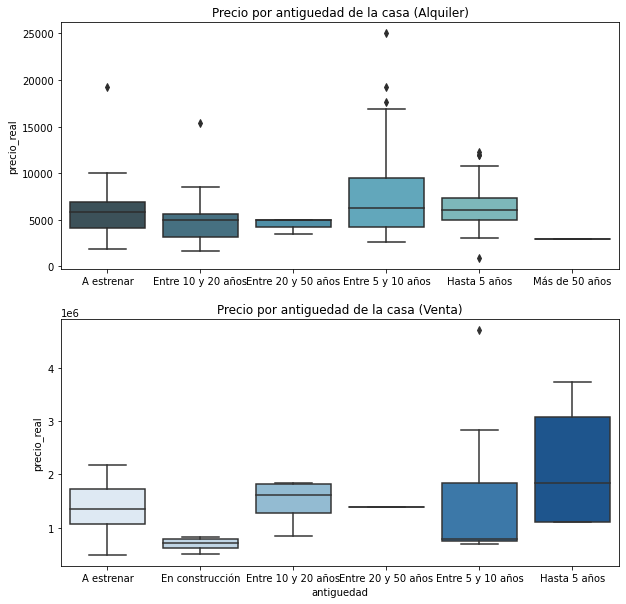

In [100]:
# Obteniendo los diferentes subsets, para venta y alquiler.
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', ['precio_real', 'antiguedad']]
dfTemp1['antiguedad'] = dfTemp1['antiguedad'].astype('category')

dfTemp2 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', ['precio_real', 'antiguedad']]
dfTemp2['antiguedad'] = dfTemp2['antiguedad'].astype('category')


# Definiendo el lienzo como subplots de 2 filas y 1 columna
fig, ax = plt.subplots(2, 1)

# Definiendo tamano
fig.set_figheight(10)
fig.set_figwidth(10)

# Generando la primera grafica (Alquiler)
g1 = sns.boxplot(y='precio_real', x='antiguedad', data=dfTemp1, ax=ax[0], palette = 'GnBu_d')
#g1.set(xticklabels=[])
g1.set(title='Precio por antiguedad de la casa (Alquiler)')
g1.set(xlabel=None)

# Generando la segunda grafica (Venta)
g2 = sns.boxplot(y='precio_real', x='antiguedad', data=dfTemp2, ax=ax[1], palette = 'Blues')
#g2.set(xticklabels=[])
g2.set(title='Precio por antiguedad de la casa (Venta)')
#g2.set(xlabel=None)

# Se muestra la grafica
plt.show()

### Precio por banos

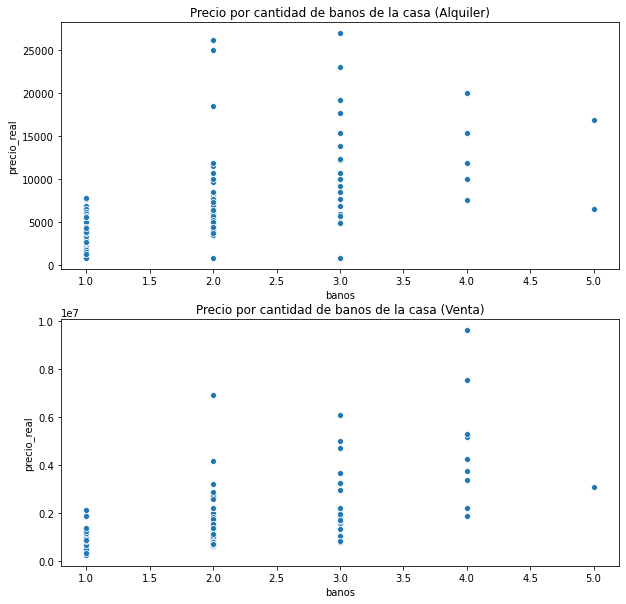

In [108]:
# Obteniendo los subsets a evaluar
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', ['precio_real', 'banos']]
dfTemp2 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', ['precio_real', 'banos']]

# Definiendo el lienzo como subplots de 2 filas y 1 columna
fig, ax = plt.subplots(2, 1)

# Definiendo tamano
fig.set_figheight(10)
fig.set_figwidth(10)

# Se genera la primera grafica
g1 = sns.scatterplot(x="banos", y="precio_real", data=dfTemp1, ax = ax[0])
g1.set(title='Precio por cantidad de banos de la casa (Alquiler)')

# Se genera la segunda grafica
g2 = sns.scatterplot(x="banos", y="precio_real", data=dfTemp2, ax = ax[1])
g2.set(title='Precio por cantidad de banos de la casa (Venta)')

plt.show()

### Precio por habitaciones

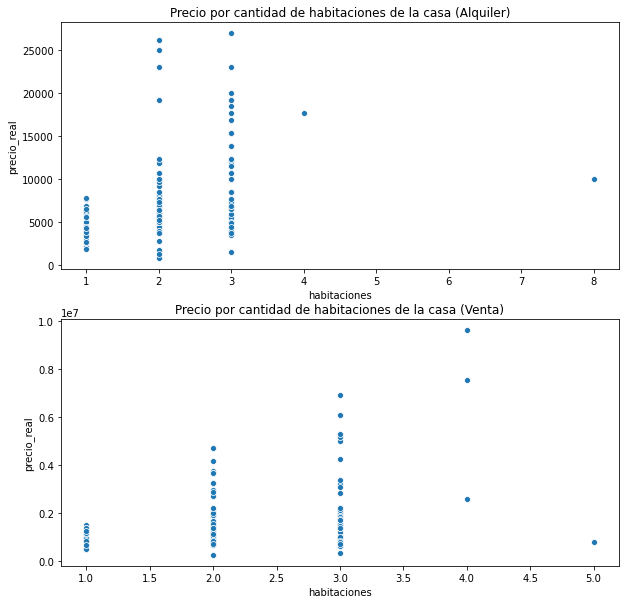

In [109]:
# Obteniendo los subsets a evaluar
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', ['precio_real', 'habitaciones']]
dfTemp2 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', ['precio_real', 'habitaciones']]

# Definiendo el lienzo como subplots de 2 filas y 1 columna
fig, ax = plt.subplots(2, 1)

# Definiendo tamano
fig.set_figheight(10)
fig.set_figwidth(10)

# Se genera la primera grafica
g1 = sns.scatterplot(x="habitaciones", y="precio_real", data=dfTemp1, ax = ax[0])
g1.set(title='Precio por cantidad de habitaciones de la casa (Alquiler)')

# Se genera la segunda grafica
g2 = sns.scatterplot(x="habitaciones", y="precio_real", data=dfTemp2, ax = ax[1])
g2.set(title='Precio por cantidad de habitaciones de la casa (Venta)')

plt.show()

### Precio por espacio (m2)

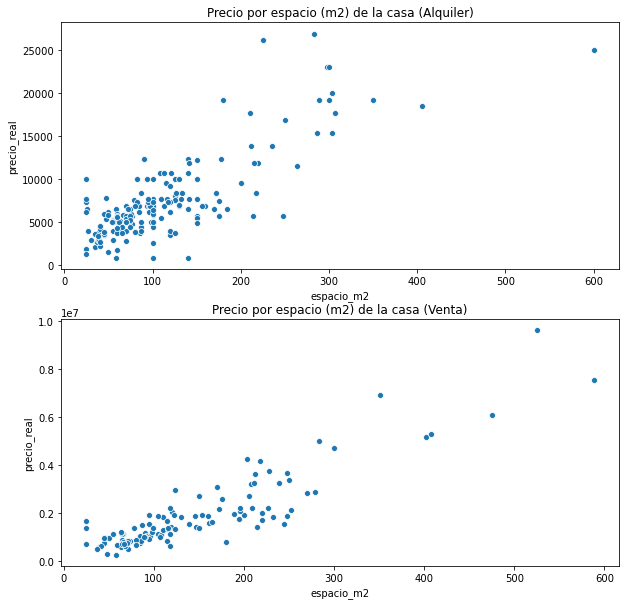

In [110]:
# Obteniendo los subsets a evaluar
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', ['precio_real', 'espacio_m2']]
dfTemp2 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', ['precio_real', 'espacio_m2']]

# Definiendo el lienzo como subplots de 2 filas y 1 columna
fig, ax = plt.subplots(2, 1)

# Definiendo tamano
fig.set_figheight(10)
fig.set_figwidth(10)

# Se genera la primera grafica
g1 = sns.scatterplot(x="espacio_m2", y="precio_real", data=dfTemp1, ax = ax[0])
g1.set(title='Precio por espacio (m2) de la casa (Alquiler)')

# Se genera la segunda grafica
g2 = sns.scatterplot(x="espacio_m2", y="precio_real", data=dfTemp2, ax = ax[1])
g2.set(title='Precio por espacio en metros cuadrados de la casa (Venta)')

plt.show()

### Precio y ubicacion

In [149]:
# Creacion del mapa ubicado en ciudad de Guatemala
m = folium.Map(location=[14.6407, -90.5132], zoom_start=12.3)

# Obteniendo los subsets a evaluar
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', ['precio_real', 'latitud', 'longitud', 'linkpagina']]

# Agregando marcadores circules
for i in range(0,len(dfTemp1['precio_real'])):
    folium.Circle(
        location=[dfTemp1.iloc[i]['latitud'], dfTemp1.iloc[i]['longitud']],
        popup=str(dfTemp1.iloc[i]['precio_real']) + dfTemp1.iloc[i]['linkpagina'],
        radius=dfTemp1.iloc[i]['precio_real']/100,
        color='blue',
        fill=True,
        fill_color='blue').add_to(m)


m

In [154]:
# Creacion del mapa ubicado en ciudad de Guatemala
m = folium.Map(location=[14.6407, -90.5132], zoom_start=12.3)

# Obteniendo los subsets a evaluar
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', ['precio_real', 'latitud', 'longitud', 'linkpagina']]

# Agregando marcadores circules
for i in range(0,len(dfTemp1['precio_real'])):
    folium.Circle(
        location=[dfTemp1.iloc[i]['latitud'], dfTemp1.iloc[i]['longitud']],
        popup=str(dfTemp1.iloc[i]['precio_real']) + dfTemp1.iloc[i]['linkpagina'],
        radius=dfTemp1.iloc[i]['precio_real']/10000,
        color='blue',
        fill=True,
        fill_color='blue').add_to(m)


m